In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from keras.models import Sequential
from keras.layers import Dense


In [71]:
np.random.seed(7)

##### Reading dataset

In [72]:
dataframe = pd.read_csv('/home/hasan/DATA SET/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)

In [73]:
#head of the dataset
dataframe.head()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121


In [74]:
#only values of the dataset
dataset = dataframe.values

##### Changing Type

In [75]:
dataset = dataset.astype('float32')
dataset

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [30

##### Dividing Dataset into Train Test

In [76]:
# split into train and test sets
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))


100 44


##### Seperating Feature and Label data

In [77]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [78]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

##### Model

In [79]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))


In [80]:
#model summary
model.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 8)                 16        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [81]:
#model compile
model.compile(loss='mean_squared_error', optimizer='adam')


##### Fit Model

In [82]:
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
 - 0s - loss: 78363.1772
Epoch 2/200
 - 0s - loss: 56649.2541
Epoch 3/200
 - 0s - loss: 39151.7769
Epoch 4/200
 - 0s - loss: 25643.5898
Epoch 5/200
 - 0s - loss: 15774.9716
Epoch 6/200
 - 0s - loss: 9064.8348
Epoch 7/200
 - 0s - loss: 4883.4349
Epoch 8/200
 - 0s - loss: 2475.7141
Epoch 9/200
 - 0s - loss: 1333.4226
Epoch 10/200
 - 0s - loss: 833.3106
Epoch 11/200
 - 0s - loss: 647.2356
Epoch 12/200
 - 0s - loss: 583.1966
Epoch 13/200
 - 0s - loss: 567.7640
Epoch 14/200
 - 0s - loss: 567.0125
Epoch 15/200
 - 0s - loss: 561.8294
Epoch 16/200
 - 0s - loss: 560.6025
Epoch 17/200
 - 0s - loss: 559.1510
Epoch 18/200
 - 0s - loss: 561.7167
Epoch 19/200
 - 0s - loss: 560.3163
Epoch 20/200
 - 0s - loss: 565.5333
Epoch 21/200
 - 0s - loss: 563.3594
Epoch 22/200
 - 0s - loss: 563.6974
Epoch 23/200
 - 0s - loss: 564.9389
Epoch 24/200
 - 0s - loss: 561.9073
Epoch 25/200
 - 0s - loss: 561.9515
Epoch 26/200
 - 0s - loss: 564.2723
Epoch 27/200
 - 0s - loss: 564.5893
Epoch 28/200
 - 0s - lo

##### Evaluate Model

In [83]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))


Train Score: 557.44 MSE (23.61 RMSE)
Test Score: 2497.45 MSE (49.97 RMSE)


##### Visualize

In [84]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


In [85]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


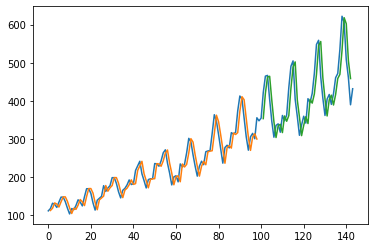

In [86]:
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Multilayer Perceptron Using the Window Method

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense


In [98]:
# fix random seed for reproducibility
np.random.seed(7)


##### Reading Dataset

In [99]:
# load the dataset
dataframe = pd.read_csv('/home/hasan/DATA SET/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

##### Split dataset

In [100]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


##### Dividing dataset into train test

In [101]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [102]:
# reshape dataset
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

##### Model

In [103]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation= 'relu' ))
model.add(Dense(1))


In [104]:
#summary of the Model
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 8)                 32        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [105]:
#compile Model
model.compile(loss= 'mean_squared_error' , optimizer= 'adam' )

##### Train Model

In [106]:
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
 - 0s - loss: 10104.8911
Epoch 2/200
 - 0s - loss: 3679.3738
Epoch 3/200
 - 0s - loss: 1314.6025
Epoch 4/200
 - 0s - loss: 833.1258
Epoch 5/200
 - 0s - loss: 803.3332
Epoch 6/200
 - 0s - loss: 792.0966
Epoch 7/200
 - 0s - loss: 758.3648
Epoch 8/200
 - 0s - loss: 744.0645
Epoch 9/200
 - 0s - loss: 722.5849
Epoch 10/200
 - 0s - loss: 707.2076
Epoch 11/200
 - 0s - loss: 707.0422
Epoch 12/200
 - 0s - loss: 704.5059
Epoch 13/200
 - 0s - loss: 699.4453
Epoch 14/200
 - 0s - loss: 700.4596
Epoch 15/200
 - 0s - loss: 705.9572
Epoch 16/200
 - 0s - loss: 707.5845
Epoch 17/200
 - 0s - loss: 689.3888
Epoch 18/200
 - 0s - loss: 686.5525
Epoch 19/200
 - 0s - loss: 679.1328
Epoch 20/200
 - 0s - loss: 692.6837
Epoch 21/200
 - 0s - loss: 681.0155
Epoch 22/200
 - 0s - loss: 676.3342
Epoch 23/200
 - 0s - loss: 680.7434
Epoch 24/200
 - 0s - loss: 658.4776
Epoch 25/200
 - 0s - loss: 679.4108
Epoch 26/200
 - 0s - loss: 667.6847
Epoch 27/200
 - 0s - loss: 662.5021
Epoch 28/200
 - 0s - loss: 671.36

##### Evaluate Model

In [107]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 480.97 MSE (21.93 RMSE)
Test Score: 2000.27 MSE (44.72 RMSE)


##### Predict

In [108]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

##### Visualize

In [109]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

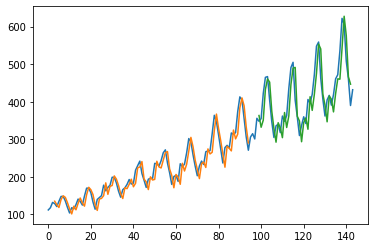

In [110]:
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# LSTM For Regression with Time Steps

In [ ]:
#change of previous code
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [113]:
# fix random seed for reproducibility
np.random.seed(7)


##### Reading dataset

In [114]:
# load the dataset
dataframe = pd.read_csv('/home/hasan/DATA SET/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')


##### Normalize dataset

In [115]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


##### split dataset

In [116]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))


96 48


##### Dividing into train test

In [117]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)


In [118]:
# reshape dataset
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


##### Reshape 

In [119]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

##### Model

In [120]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(LSTM(4, input_shape=(None,1)))
model.add(Dense(1))

In [121]:
#summary of the Model
model.summary()


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [122]:
#compile Model
model.compile(loss='mean_squared_error', optimizer='adam')


##### Train Model

In [123]:
model.fit(trainX, trainY, epochs=200, batch_size=1, verbose=2)


Epoch 1/200
 - 1s - loss: 0.0641
Epoch 2/200
 - 0s - loss: 0.0269
Epoch 3/200
 - 0s - loss: 0.0189
Epoch 4/200
 - 0s - loss: 0.0167
Epoch 5/200
 - 0s - loss: 0.0145
Epoch 6/200
 - 0s - loss: 0.0127
Epoch 7/200
 - 0s - loss: 0.0109
Epoch 8/200
 - 0s - loss: 0.0093
Epoch 9/200
 - 0s - loss: 0.0075
Epoch 10/200
 - 0s - loss: 0.0064
Epoch 11/200
 - 0s - loss: 0.0054
Epoch 12/200
 - 0s - loss: 0.0048
Epoch 13/200
 - 0s - loss: 0.0045
Epoch 14/200
 - 0s - loss: 0.0042
Epoch 15/200
 - 0s - loss: 0.0042
Epoch 16/200
 - 0s - loss: 0.0042
Epoch 17/200
 - 0s - loss: 0.0040
Epoch 18/200
 - 0s - loss: 0.0041
Epoch 19/200
 - 0s - loss: 0.0041
Epoch 20/200
 - 0s - loss: 0.0040
Epoch 21/200
 - 0s - loss: 0.0040
Epoch 22/200
 - 0s - loss: 0.0040
Epoch 23/200
 - 0s - loss: 0.0040
Epoch 24/200
 - 0s - loss: 0.0040
Epoch 25/200
 - 0s - loss: 0.0039
Epoch 26/200
 - 0s - loss: 0.0040
Epoch 27/200
 - 0s - loss: 0.0039
Epoch 28/200
 - 0s - loss: 0.0041
Epoch 29/200
 - 0s - loss: 0.0039
Epoch 30/200
 - 0s - lo

##### Predict

In [124]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


##### inverse Prediction

In [125]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

##### Evaluate Model

In [126]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 20.85 RMSE
Test Score: 49.85 RMSE


##### Visualize

In [127]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


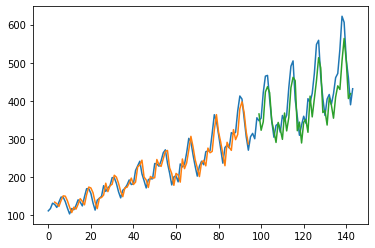

In [128]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


# LSTM With Memory Between Batches

In [ ]:
#change of previous code
for i in range(100):
    model.fit(trainX, trainY, nb_epoch=1, batch_size=batch_size, verbose=2, shuffle=False)
    model.reset_states()


In [131]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [132]:
# fix random seed for reproducibility
np.random.seed(7)

##### Reading dataset

In [133]:
# load the dataset
dataframe = pd.read_csv('/home/hasan/DATA SET/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')


##### Normalize data

In [134]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


##### spliting dataset

In [135]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))


96 48


##### Dividing dataset into train test

In [136]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)


In [137]:
# reshape dataset
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


##### Reshape

In [138]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))


##### Model

In [139]:
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))


In [140]:
#summary of the model
model.summary()


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (1, 4)                    96        
_________________________________________________________________
dense_13 (Dense)             (1, 1)                    5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [141]:
#compile model
model.compile(loss='mean_squared_error', 
              optimizer= 'adam')


##### Fit Model

In [142]:
for i in range(100):
    model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
    model.reset_states()
    

Epoch 1/1
 - 1s - loss: 0.0046
Epoch 1/1
 - 0s - loss: 0.0084
Epoch 1/1
 - 0s - loss: 0.0063
Epoch 1/1
 - 0s - loss: 0.0052
Epoch 1/1
 - 0s - loss: 0.0046
Epoch 1/1
 - 0s - loss: 0.0044
Epoch 1/1
 - 0s - loss: 0.0042
Epoch 1/1
 - 0s - loss: 0.0042
Epoch 1/1
 - 0s - loss: 0.0042
Epoch 1/1
 - 0s - loss: 0.0041
Epoch 1/1
 - 0s - loss: 0.0041
Epoch 1/1
 - 0s - loss: 0.0041
Epoch 1/1
 - 0s - loss: 0.0041
Epoch 1/1
 - 0s - loss: 0.0040
Epoch 1/1
 - 0s - loss: 0.0040
Epoch 1/1
 - 0s - loss: 0.0040
Epoch 1/1
 - 0s - loss: 0.0040
Epoch 1/1
 - 0s - loss: 0.0039
Epoch 1/1
 - 0s - loss: 0.0039
Epoch 1/1
 - 0s - loss: 0.0039
Epoch 1/1
 - 0s - loss: 0.0039
Epoch 1/1
 - 0s - loss: 0.0038
Epoch 1/1
 - 0s - loss: 0.0038
Epoch 1/1
 - 0s - loss: 0.0038
Epoch 1/1
 - 0s - loss: 0.0038
Epoch 1/1
 - 0s - loss: 0.0037
Epoch 1/1
 - 0s - loss: 0.0037
Epoch 1/1
 - 0s - loss: 0.0037
Epoch 1/1
 - 0s - loss: 0.0037
Epoch 1/1
 - 0s - loss: 0.0036
Epoch 1/1
 - 0s - loss: 0.0036
Epoch 1/1
 - 0s - loss: 0.0036
Epoch 1/

##### Predict

In [143]:
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)


##### invert prediction

In [144]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


##### root mean square

In [145]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 26.14 RMSE
Test Score: 50.59 RMSE


##### Visualization

In [146]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


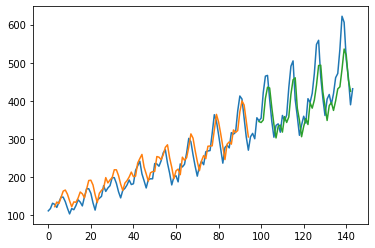

In [147]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
